In [1]:
import pickle
from sklearn.linear_model import LogisticRegression

# rb: 바이러리 데이터를 읽어들이는 옵션
with open('processed.pickle', 'rb') as file_handle:
    vocabulary, features, labels = pickle.load(file_handle)

In [2]:
# 학습-평가 데이터 나누기
# 처음 50%를 학습으로 사용하고 나머지를 평가로 사용합니다.
total_number = len(labels)
middle_index = total_number//2
train_features = features[:middle_index,:]
train_labels = labels[:middle_index]
test_features = features[middle_index:,:]
test_labels = labels[middle_index:]

In [3]:
# TF-IDF 정보가 화소행렬(sparse matrix)로 압축되어 저장
train_features[:5]

<5x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 64 stored elements in Compressed Sparse Row format>

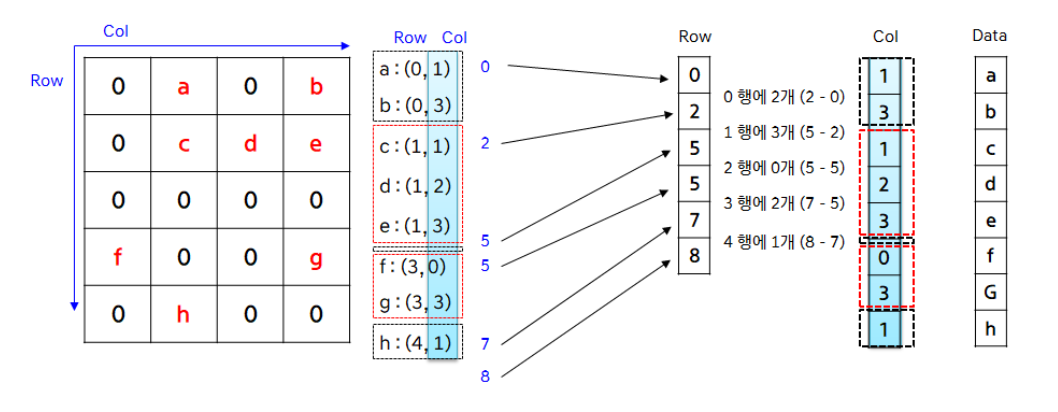

In [4]:
classifier = LogisticRegression() # 성능 향상을 위해 새로운 모델을 사용할 수 있다.
classifier.fit(train_features, train_labels)
print('train accuracy: %4.4f' % classifier.score(train_features, train_labels))
print('test accuracy: %4.4f' % classifier.score(test_features, test_labels))

# 어떤 항목이 판별에 영향을 많이 줬는지 찾아보기
weights = classifier.coef_[0, :]
pairs = []
for index, value in enumerate(weights):
    pairs.append( (abs(value), vocabulary[index]) )
pairs.sort(key=lambda x: x[0], reverse=True)
for pair in pairs[:20]:
    print('score %4.4f word: %s' % pair)

train accuracy: 0.9659
test accuracy: 0.9480
score 4.0001 word: txt
score 3.4521 word: call
score 3.2910 word: free
score 2.7635 word: to
score 2.5109 word: claim
score 2.4553 word: www
score 2.4490 word: stop
score 2.4278 word: uk
score 2.2604 word: text
score 2.2016 word: 150p
score 2.1835 word: service
score 2.1580 word: mobile
score 1.9421 word: my
score 1.9399 word: prize
score 1.9165 word: chat
score 1.8700 word: me
score 1.8646 word: reply
score 1.8335 word: from
score 1.8333 word: 18
score 1.8222 word: or


## 성능 향상을 위해 선택적으로 적용할 수 있는 실험
* idf 점수를 빼고 모델 학습
* 성능이 향상이 되었다면 어떤 이유로 향상이 되었을지 생각해 보자